In [11]:
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import plot_histogram
from math import gcd
import math

In [12]:
 # Code to find the factors of N=15 using Shor's algorithm
N = 15
a = 2

# Defining a function that finds a%N for a=2
def circuit_2mod15(qc,qr,cr):
    qc.cswap(qr[4],qr[3],qr[2])
    qc.cswap(qr[4],qr[2],qr[1])
    qc.cswap(qr[4],qr[1],qr[0])


# Defining a function that finds order/period of a mod N
def circuit_2mod15_period(qc,qr,cr,a):
    
    # Initialize q[0] to |1> 
    qc.x(qr[0])

    # Apply a**4 mod 15
    # ------------------
    qc.h(qr[4])
    # Controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    qc.h(qr[4])
    # Measure quantum bit into classical bit
    qc.measure(qr[4],cr[0])
    # Reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a**2 mod 15
    # ------------------
    qc.h(qr[4])
    # Controlled unitary: cx(self, ctl, tgt),
    # apply CX from ctl to tgt
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[0])
  
    qc.rz(math.pi/2.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    # Measure
    qc.measure(qr[4],cr[1])
    # Reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a mod 15
    # ------------------
    qc.h(qr[4])
    circuit_2mod15(qc,qr,cr)
    # Feed forward
    qc.rz(3.*math.pi/4.,qr[4]).c_if(cr, 3)
    qc.rz(math.pi/2.,qr[4]).c_if(cr, 2)
    qc.rz(math.pi/4.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    # Measure
    qc.measure(qr[4],cr[2])



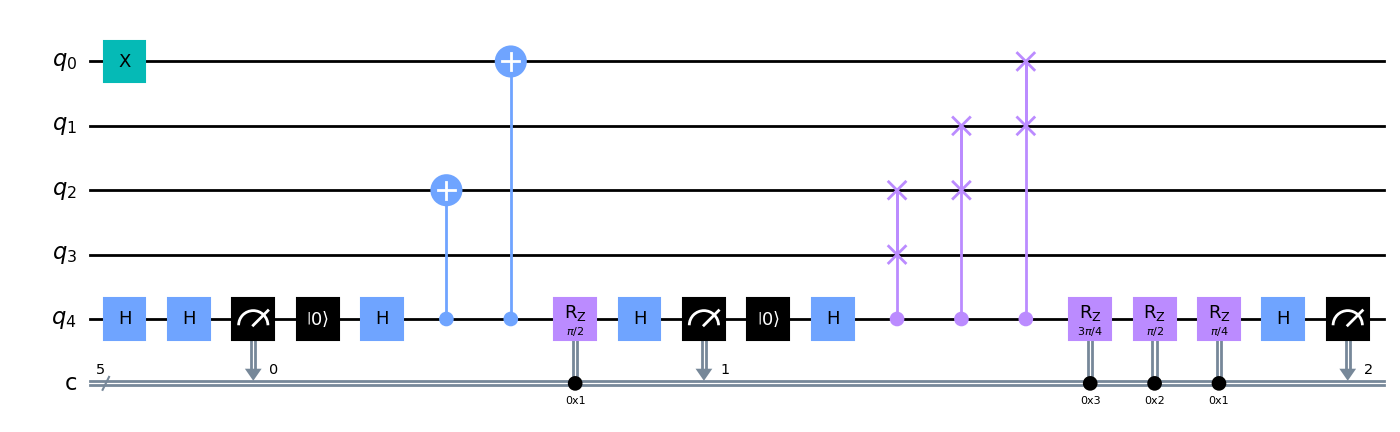

In [13]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(5, 'c')

qc = QuantumCircuit(qr, cr)
circuit_2mod15_period(qc,qr,cr,a)

qc.draw(output='mpl')

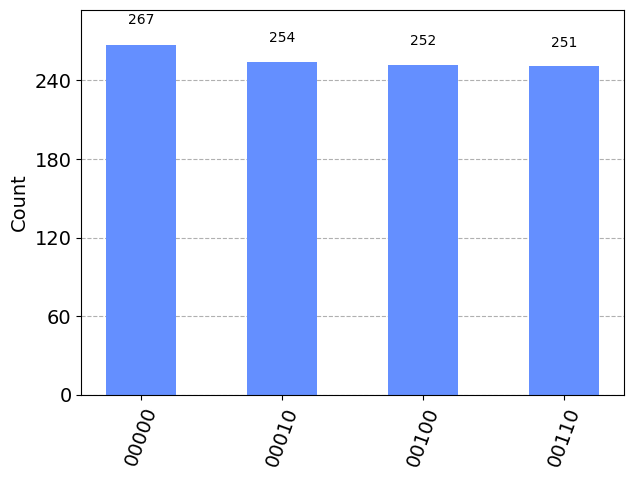

In [14]:
backend = BasicAer.get_backend('qasm_simulator')
sim_job = execute([qc], backend)
sim_result = sim_job.result()
sim_data = sim_result.get_counts(qc) 
plot_histogram(sim_data)


In [15]:
r_l=list(sim_data)
print(r_l)

rb=r_l[2]
r=int(rb,2)
print(r)
    

['00100', '00000', '00010', '00110']
2


In [16]:
k=gcd(r+1,15)
l=gcd(r-1,15)
# print(k,l)
print("Factors of 15 : ")

if(15%k==0 and 15%l==0 and k!=1 and l!=1):
    print(k , l)
elif(15%k==0 and k!=1):
    print(k, 15/k)
elif(15%l==0 and l!=1):
    print(l, 15/l)
if(k==1 and l==1):
    print("Try again : Both of the factors obtained was 1 which is not prime")

Factors of 15 : 
3 5.0
